In [172]:
import pandas as pd
import numpy as np
import sklearn
import imblearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [173]:
data = pd.read_csv("./data/diabetes.csv")
col = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Diabetes"]
data.columns = col

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [175]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can observe that all values are numerical except Diabetes which is 1 for positive and 0 for negative

## Exploratory Data Analysis

<ipython-input-176-6709aa251a4e>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


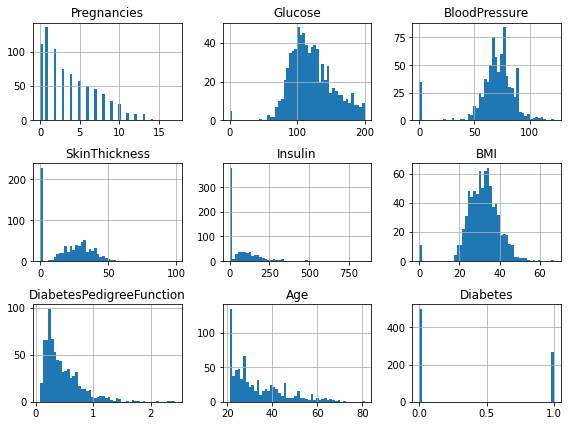

In [176]:
data.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()

We can see that Columns like SkinThickness and Insulin have values at 0. So it could be missing features

In [177]:
data.drop("Diabetes", axis=1).isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Apart from Pedigree Function and Age, all columns have 0 values. Having 0 values makes sense for pregnancies column but not for other columns. So replacing 0 with NaN value

In [178]:
col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for c in col_missing:
    data[c] = data[c].replace(to_replace=0, value=np.NaN)

Checking Histograms again

<ipython-input-179-6709aa251a4e>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


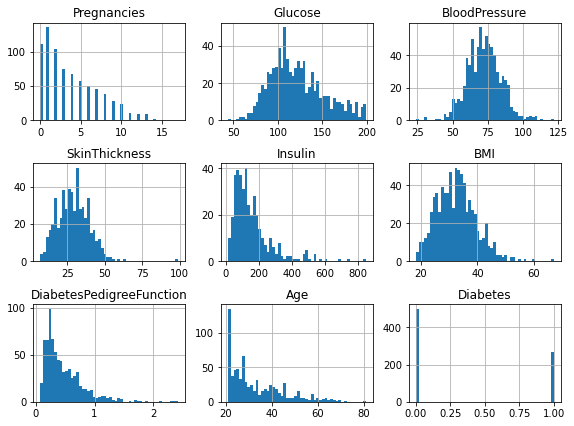

In [179]:
data.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()

Plots show that Diabetes is skewed towards 0. So there are multiple entries of people with no diabetes

There are 268 (34.90%) people who have diabetes and the remaining 500 (65.10%) who have not been diagnosed with the desease.


<ipython-input-180-f484dc64eaff>:25: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


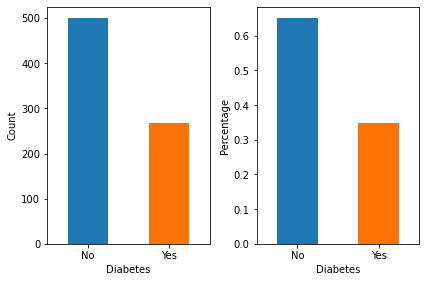

In [180]:
num_diabetes = data[ "Diabetes" ].sum()
num_no_diabetes = data.shape[ 0 ] - num_diabetes
perc_diabetes = num_diabetes / data.shape[ 0 ] * 100
perc_no_diabetes = num_no_diabetes / data.shape[ 0 ] * 100

print( "There are %d (%.2f%%) people who have diabetes and the remaining %d (%.2f%%) who have not been diagnosed with the desease." % ( num_diabetes, perc_diabetes, num_no_diabetes, perc_no_diabetes ) )

def plot_diabetes( normalize ):
    plt.grid( False )
    data.Diabetes.value_counts( normalize=normalize ).plot( kind="bar", grid=False, color=[ sns.color_palette()[ 0 ], sns.colors.xkcd_rgb.get( 'orange' ) ] )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes' ], rotation=0 )
    plt.xlabel( "Diabetes" )
    
    if ( normalize == False ):
        plt.ylabel( "Count" )
    else:
        plt.ylabel( "Percentage" )    
        
    return
    
plt.subplot( 1, 2, 1 )
plot_diabetes( False )
plt.subplot( 1, 2, 2 )
plot_diabetes( True )
plt.tight_layout( True )
plt.show()

## Checking Statistical Values
- Count: No of observations
- Mean: Mean of the values
- Std: Standard Deviation of values
- Min: Minimum Value
- Max: Maximum Value
- Q1: 25% of values Lower Quartile
- Median: Center Value
- Q3: 75% of values Upper Quartile

In [181]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Columns like SkinThickness and Insuling have max value far away from the mean. This indicates outliers.

## Correlation Analysis

ρX,Y=cov(X,Y)/σXσY

The coefficient can only take values between -1 and 1:

    the closer the value to 1, the higher the positive linear relationship.
    the closer the value to 0, the lower the linear relationship.
    the closer the value to -1, the higher the negative linear relationship.


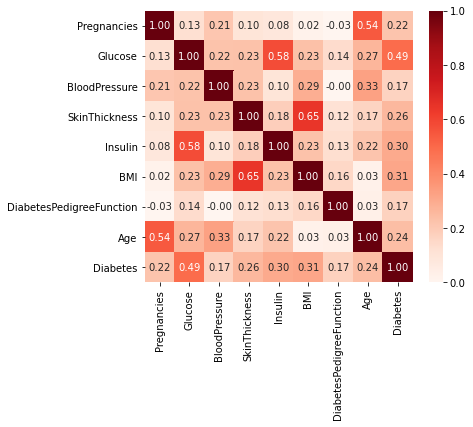

In [182]:
plt.figure(figsize = (6.0, 5.0))
plt.grid(False)
plt.xticks(range(data.shape[1]), data.columns[0:], rotation=0)
plt.yticks(range(data.shape[1]), data.columns[0:], rotation=0)
sns.heatmap(data.corr(), cbar=True, annot=True, square=False, fmt='.2f', cmap=plt.cm.Reds, robust=False, vmin=0)
plt.show()

As we observe not much correlation between features except for some values that are greater than 0.5
The features are:
- Age-Pregnancies : Pregnancies can increase with age and stop after a certain age
- Glucose-Diabetes : Higher glucose count has higher probability of being diagnose with diabetes
- Glucose-Insulin : Higher level Glucose means more Insulin
- BMI-SkinThickness : Higher the BMI, fatter the person is

Observing these correlations using scatterplot

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<ipython-input-183-8a79956b7e99>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(False)


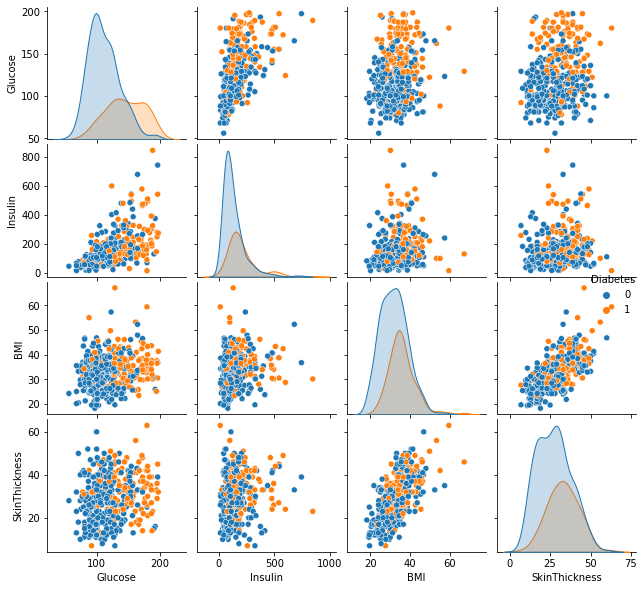

In [183]:
sns.pairplot(data.dropna(), vars = ['Glucose', 'Insulin','BMI','SkinThickness'], size= 2.0, diag_kind='kde', hue='Diabetes')
plt.tight_layout(False)
plt.show()

There is a positive linear relationship between Insulin, Glucose and BMI, SkinThickness.

## Boxplots
Using this visualization to check for outliers

<ipython-input-184-1266f5867621>:9: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


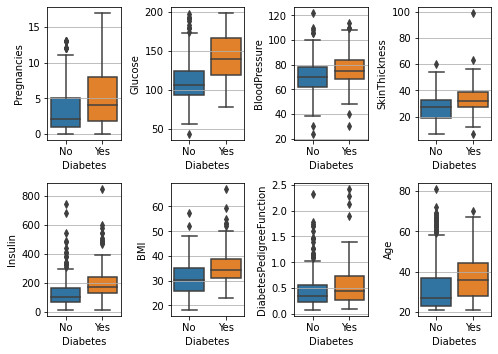

In [184]:
plt.figure( figsize=( 7.0, 5.0 ) )

for i in range( 8 ):
    plt.subplot( 2, 4, i + 1 )
    plt.grid( True )
    sns.boxplot( x='Diabetes', y=data.columns[ i ], data=data )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes' ], rotation=0 )

plt.tight_layout( True )
plt.show()

We can see that there are multiple outliers

Using Crosstabs to check the correlation between Glucose and Diabetes

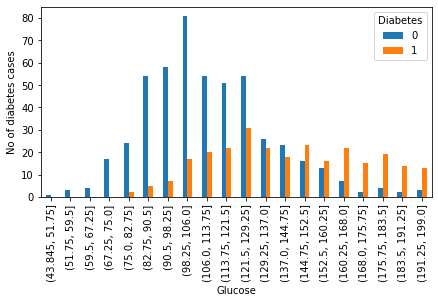

In [185]:
pd.crosstab(pd.cut(data.Glucose, bins=20), data.Diabetes).plot(
kind='bar', figsize=(7.0, 3.5))
plt.ylabel("No of diabetes cases")
plt.show()

This graph shows that higher values of Glucose have persons with diabetes. So Glucose is an important factor in predicting Diabetes

Now checking with Insulin Values

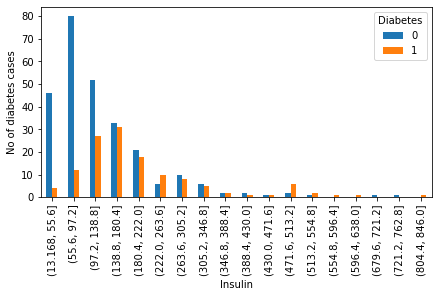

In [186]:
pd.crosstab(pd.cut(data.Insulin, bins=20), data.Diabetes).plot(
kind='bar', figsize=(7.0, 3.5))
plt.ylabel("No of diabetes cases")
plt.show()

This trend is not as clear as Glucose levels as higher levels of Insulin do not always result in Diabetes

## Pre-processing Data

Split into train and test data. I will be using 80% for training and 20% as the test set.

In [187]:
from sklearn.model_selection import train_test_split

X = data.drop(["Diabetes"], axis=1)
Y = data.Diabetes

X_Train, X_Test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state=42, shuffle =True,
                                                   stratify= Y)

Since our data set contains multiple Null values, we need to impute them by either:
- Removing them from the data set
- Estimating those values and adding a median value

Choosing to replace these values with median since the training set is small

In [188]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy='median')

X_train_Impute = impute.fit_transform(X_Train)
X_test_Impute = impute.fit_transform(X_Test)

# Normalizing the data

This is done to bring all values to a similar scale

In [189]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

X_train_normal = s.fit_transform(X_train_Impute)
X_test_normal = s.fit_transform(X_test_Impute)

data_X_train_normal = pd.DataFrame( X_train_normal, columns=col[ 0:8 ], index=y_train.index )
data_y_train_normal = pd.DataFrame( y_train, columns = [ col[ 8 ] ] )
data_train_normalized = data_X_train_normal.join( data_y_train_normal )

## Principal Component Analysis

It is an unsupervised machine learning algorithm that reduces the dimensionality of the dataset

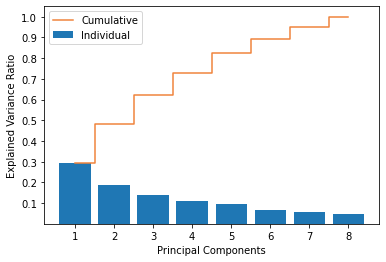

In [190]:
from sklearn.decomposition import PCA

pca = PCA( whiten=True )
pca.fit( X_train_normal )

pca_evr = pca.explained_variance_ratio_
pca_evr_cum = np.cumsum( pca_evr )

x = np.arange( 1, len( pca_evr ) + 1 )
y = np.linspace( 0.1, 1, 10 )

plt.bar( x, pca_evr, alpha=1, align='center', label='Individual' )
plt.step( x, pca_evr_cum, where='mid', label='Cumulative', color=sns.colors.xkcd_rgb.get( 'dusty orange' ) )
plt.ylabel( 'Explained Variance Ratio' )
plt.xlabel( 'Principal Components' )
plt.legend()
plt.xticks( x )
plt.yticks( y )
plt.show()

So higher the number of Principal Components retained, higer is the variance preserved. But it also means that we have higher number of features.

In [191]:
pca = PCA(n_components=6)

X_train_pca = pca.fit_transform(X_train_normal)
X_test_pca = pca.fit_transform(X_test_normal)

In [192]:
print("Train Set columns: ", X_train_pca.shape[1])
print("Test Set Columns: ", X_test_pca.shape[1])

Train Set columns:  6
Test Set Columns:  6


We reduced the number of dimensions from 8 to 6

## SMOTE: Synthetic Minority Oversampling Technique

Our data set is pretty small for the classification to work efficiently. So we use SMOTE which is an oversampling approach where minority class are oversampled using synthetic data samples

In [193]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state=42 )
X_train_smote, y_train_smote = smote.fit_resample( X_train_normal, y_train )

data_X_train_smote = pd.DataFrame( X_train_smote, columns=col[ 0:8 ] )
data_y_train_smote = pd.DataFrame( y_train_smote, columns = [ col[ 8 ] ] )
data_train_smote = data_X_train_smote.join( data_y_train_smote )

There are 400 (50.00%) people with diabetes and 400 (50.00%) people without diabetes.


<ipython-input-194-a2c459f6cf25>:25: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


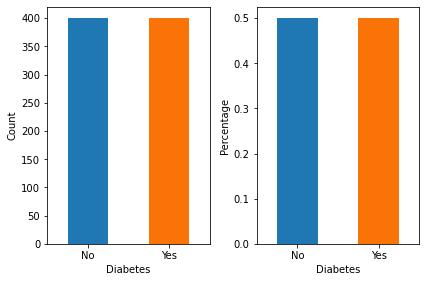

In [194]:
num_diabetes_smote = data_train_smote[ "Diabetes" ].sum()
num_no_diabetes_smote = data_train_smote.shape[ 0 ] - num_diabetes_smote
perc_diabetes_smote = num_diabetes_smote / data_train_smote.shape[ 0 ] * 100
perc_no_diabetes_smote = num_no_diabetes_smote / data_train_smote.shape[ 0 ] * 100

print( "There are %d (%.2f%%) people with diabetes and %d (%.2f%%) people without diabetes." % ( num_diabetes_smote, perc_diabetes_smote, num_no_diabetes_smote, perc_no_diabetes_smote ) )

def plot_diabetes_value_counts( normalize ):
    plt.grid( False )
    data_train_smote[ 'Diabetes' ].value_counts( normalize=normalize ).plot( kind="bar", grid=False, color=[ sns.color_palette()[ 0 ], sns.colors.xkcd_rgb.get( 'orange' ) ] )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes' ], rotation=0 )
    plt.xlabel( "Diabetes" )
    
    if ( normalize == False ):
        plt.ylabel( "Count" )
    else:
        plt.ylabel( "Percentage" )    
        
    return
    
plt.subplot( 1, 2, 1 )
plot_diabetes_value_counts( False )
plt.subplot( 1, 2, 2 )
plot_diabetes_value_counts( True )
plt.tight_layout( True )
plt.show()

This helped us balance out the two Diabetes classes

## Classification Models

I will be using two models:
- K-Nearest Neighbors
- Decision Tree

Comparing the results between these two models

Also including 5-Fold-Cross Validation

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [196]:
def get_estimator_names( estimator_name ):
    estimator_name_smote = estimator_name + " (SMOTE)"
    estimator_name_pca = estimator_name + " (PCA)"
    
    return [ estimator_name, estimator_name_smote, estimator_name_pca ]

In [197]:
def print_grid_search_cross_validation_model_details( gscv_model, estimator_name, scoring ):
    print()
    print( estimator_name )
    print( "Best parameters: ", gscv_model.best_params_ )
    
    return

In [198]:
def grid_search_cv_fit( estimator, param_grid, X_train, scoring='f1' ):
    gscv = GridSearchCV( estimator=estimator, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring )
    gscv.fit( X=X_train, y=y_train )
    
    return gscv

In [199]:
def grid_search_cv_fit_smote( estimator, param_grid, X_train, scoring='accuracy' ):
    pipeline_param_grid = {}

    try:
        for key in param_grid.keys():
            pipeline_param_grid[ "estimator__" + key ] = param_grid[ key ]
            
    except:
        pipeline_param_grid = []
        
        for d in param_grid:
            grid = {}
            
            for key in d.keys():
                grid[ "estimator__" + key ] = d[ key ]
                
            pipeline_param_grid.append( grid )
    
    
    smote = SMOTE( random_state=42, n_jobs=-1 )
    pipeline = Pipeline( [ ( 'smote', smote ), ( 'estimator', estimator ) ] )
    
    return grid_search_cv_fit( pipeline, pipeline_param_grid, X_train, scoring )

In [200]:
def grid_search_cross_validation( estimator, param_grid, estimator_names ):
    gscv = grid_search_cv_fit( estimator, param_grid, X_train_normal )
    gscv_smote = grid_search_cv_fit_smote( estimator, param_grid, X_train_normal )
    gscv_pca = grid_search_cv_fit( estimator, param_grid, X_train_pca )
    
    print_grid_search_cross_validation_model_details( gscv, estimator_names[ 0 ], 'f1' )
    print_grid_search_cross_validation_model_details( gscv_smote, estimator_names[ 1 ], 'accuracy' )
    print_grid_search_cross_validation_model_details( gscv_pca, estimator_names[ 2 ], 'f1' )
    
    return [ gscv, gscv_smote, gscv_pca ]

In [201]:
def print_confusion_matrix( confusion_matrix, estimator_name ):
    plt.grid( False )
    plt.title( estimator_name )
    sns.heatmap( confusion_matrix, cbar=False, annot=True, square=False, fmt='.0f', cmap=plt.cm.Blues, robust=True, linewidths=0, linecolor='black', vmin=0 )
    plt.xlabel( "Predicted labels" )
    plt.ylabel( "True labels" )
    
    return

In [202]:
def print_compared_cofusion_matrices( test_predictions, estimator_names ):
    confusion_matrix_ = confusion_matrix( y_test, test_predictions[ 0 ] )
    confusion_matrix_smote = confusion_matrix( y_test, test_predictions[ 1 ] )
    confusion_matrix_pca = confusion_matrix( y_test, test_predictions[ 2 ] )
    
    plt.figure( figsize=( 7.0, 2.8 ) )
    
    axs = plt.subplot( 1, 3, 1 )
    print_confusion_matrix( confusion_matrix_, estimator_names[ 0 ] )
    axs.set_xlabel( "Predicted labels" )
    axs.set_ylabel( "True labels" )
    plt.subplot( 1, 3, 2 )
    print_confusion_matrix( confusion_matrix_smote, estimator_names[ 1 ] )
    plt.subplot( 1, 3, 3 )
    print_confusion_matrix( confusion_matrix_pca, estimator_names[ 2 ] )
    
    plt.tight_layout( True )
    plt.show()
    
    return

In [203]:
def test_predictions( estimators ):
    predictions = estimators[ 0 ].predict( X_test_normal )
    predictions_smote = estimators[ 1 ].predict( X_test_normal )
    predictions_pca = estimators[ 2 ].predict( X_test_pca )
    
    return [ predictions, predictions_smote, predictions_pca ]

In [204]:
def evaluate_test_predictions( test_predictions, estimator_name ):
    test_f1 = f1_score( y_test, test_predictions )
    test_accuracy = accuracy_score( y_test, test_predictions )
    test_precision = precision_score( y_test, test_predictions )
    test_recall = recall_score( y_test, test_predictions )
    
    results = { 
        'F1' : [ test_f1 ],
        'Accuracy' : [ test_accuracy ], 
        'Precision' : [ test_precision ], 
        'Recall' : [ test_recall ]
    }
    
    df_results = pd.DataFrame( results, index=[ estimator_name ] )
    
    return df_results

In [205]:
def merge_and_sort_results( results ):
    df_results = pd.DataFrame( columns=results[ 0 ].columns )

    for result in results:
        df_results = df_results.append( result )
        
    df_results = df_results.sort_values( "F1", ascending=False )
    
    return df_results.round( 3 )

In [206]:
def evaluate_test_results( test_predictions, estimator_names ):
    df_results = evaluate_test_predictions( test_predictions[ 0 ], estimator_names[ 0 ] )
    df_smote_results = evaluate_test_predictions( test_predictions[ 1 ], estimator_names[ 1 ] )
    df_pca_results = evaluate_test_predictions( test_predictions[ 2 ], estimator_names[ 2 ] )

    df_overall_results = merge_and_sort_results( [ df_results, df_pca_results, df_smote_results ] )
    
    return df_overall_results

In [207]:
def evaluate_best_estimators_results( best_estimators ):
    df_results = []
    
    for estimator in best_estimators:
        if estimator[ 1 ].endswith( "(PCA)" ):
            test_predictions = estimator[ 0 ].predict( X_test_pca )
        else:
            test_predictions = estimator[ 0 ].predict( X_test_normal )
            
        df_result = evaluate_test_predictions( test_predictions, estimator[ 1 ] )
        df_results.append( df_result )
        
    df_results = merge_and_sort_results( df_results )
    
    return df_results

In [208]:
def plot_learning_curve( estimator, X_train_, estimator_name, legend_location='best', scoring='f1', scoring_name='F1' ):
    train_sizes = np.linspace( 0.2, 1.0, 6 )
    train_size, train_scores, test_scores = learning_curve( estimator, X_train_, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, shuffle=True, random_state=42, scoring=scoring )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.title( "Learning curve: " + estimator_name )
    plt.plot( train_size, train_mean, label='Train', marker='o', markerfacecolor='white', markeredgewidth=2.0 )
    plt.fill_between(train_size,train_mean + train_std,train_mean - train_std, alpha=0.2 )
    plt.plot( train_size, test_mean, label='Validation', marker='o', markerfacecolor='white', markeredgewidth=2.0 )
    plt.fill_between(train_size,test_mean + test_std,test_mean - test_std, alpha=0.2 )
    
    plt.xlabel( 'Number of training samples' )
    plt.ylabel( scoring_name )
    
    plt.legend( loc=legend_location )
    
    plt.plot()

In [209]:
best_estimators = []

## K-Nearest Neighbors

In [210]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors' : [ 5, 9, 15, 21 ],
    'weights' : [ 'uniform', 'distance' ]
}

knn_estimator_names = get_estimator_names( "kNN" )
knn_best_estimators = grid_search_cross_validation( KNeighborsClassifier(), knn_param_grid, knn_estimator_names )


kNN
Best parameters:  {'n_neighbors': 15, 'weights': 'distance'}

kNN (SMOTE)
Best parameters:  {'estimator__n_neighbors': 9, 'estimator__weights': 'uniform'}

kNN (PCA)
Best parameters:  {'n_neighbors': 15, 'weights': 'uniform'}


Evaluating Model

In [211]:
knn_test_predictions = test_predictions( knn_best_estimators )

<ipython-input-202-a3237c7b63b8>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


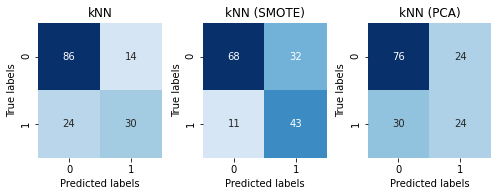

In [212]:
print_compared_cofusion_matrices( knn_test_predictions, knn_estimator_names )

In [213]:
df_knn_overall_results = evaluate_test_results( knn_test_predictions, knn_estimator_names )
df_knn_overall_results

,F1,Accuracy,Precision,Recall
kNN (SMOTE),0.667,0.721,0.573,0.796
kNN,0.612,0.753,0.682,0.556
kNN (PCA),0.471,0.649,0.500,0.444


In [214]:
knn_best_estimator = knn_best_estimators[ 1 ].best_estimator_
knn_best_estimator_name = knn_estimator_names[ 1 ]
best_estimators.append( [ knn_best_estimator, knn_best_estimator_name ] )

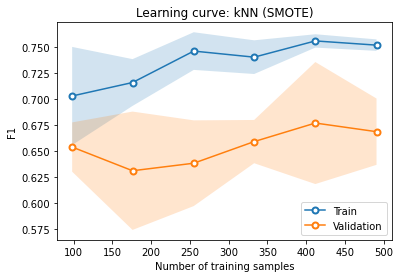

In [215]:
plot_learning_curve( knn_best_estimator, X_train_normal, knn_best_estimator_name, 'lower right' )

## Decision Tree Classifier

In [216]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_param_grid = {
    'max_depth': [ 10, 15, 20, None ],
    'criterion' : [ 'gini', 'entropy' ],
    'class_weight': [ None, 'balanced' ]
}

decision_tree_estimator_names = get_estimator_names( "Decision Tree" )
decision_tree_best_estimators = grid_search_cross_validation( DecisionTreeClassifier( random_state=42 ), decision_tree_param_grid, decision_tree_estimator_names )


Decision Tree
Best parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10}

Decision Tree (SMOTE)
Best parameters:  {'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 20}

Decision Tree (PCA)
Best parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10}


Evaluating the model

In [217]:
decision_tree_test_predictions = test_predictions( decision_tree_best_estimators )

<ipython-input-202-a3237c7b63b8>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


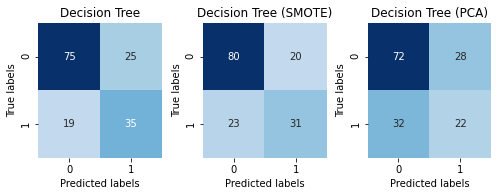

In [218]:
print_compared_cofusion_matrices( decision_tree_test_predictions, decision_tree_estimator_names )

In [219]:
df_decision_tree_overall_results = evaluate_test_results( decision_tree_test_predictions, decision_tree_estimator_names )
df_decision_tree_overall_results

,F1,Accuracy,Precision,Recall
Decision Tree,0.614,0.714,0.583,0.648
Decision Tree (SMOTE),0.590,0.721,0.608,0.574
Decision Tree (PCA),0.423,0.610,0.440,0.407


In [220]:
decision_tree_best_estimator_name = decision_tree_estimator_names[ 0 ]
decision_tree_best_estimator = decision_tree_best_estimators[ 0 ].best_estimator_
best_estimators.append( [ decision_tree_best_estimator, decision_tree_best_estimator_name ] )

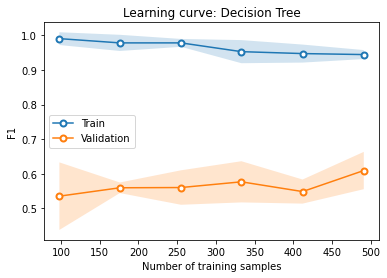

In [221]:
plot_learning_curve( decision_tree_best_estimator, X_train_normal, decision_tree_best_estimator_name, 'center left' )

Comparison between the models

In [222]:
df_results = evaluate_best_estimators_results( best_estimators )
df_results

,F1,Accuracy,Precision,Recall
kNN (SMOTE),0.667,0.721,0.573,0.796
Decision Tree,0.614,0.714,0.583,0.648
